In [1]:
import glob
import json
import gzip
import dill as pickle
import pandas as pd

In [2]:
#import sys
#import os
# Dynamically get the path of the current directory
#current_dir = os.getcwd()

# Assuming the package is one level up
#local_package_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add this path to sys.path
#sys.path.insert(0, local_package_dir)

# Now you can import your local package
from truthnet.util import validate
from truthnet.util import calculate_response_parallel

In [3]:
def getresveritas(row):
    with open('../../veritas-experiment2/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['veritas']
def getreskappa(row):
    with open('../../veritas-experiment2/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['lower_threshold']
def getresmu(row):
    with open('../../veritas-experiment2/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['score']
def getres(row):
    with open('../../veritas-experiment2/'+row.jsonpath, 'r') as file:
        data = json.load(file)
    return data[0]['responses']
def getsex(row):
    return row.Sex=='Male'
def getethnicity(row):
    if row['Ethnicity simplified'] == 'White':
        return 0
    if row['Ethnicity simplified'] == 'Black':
        return 1
    if row['Ethnicity simplified'] == 'Asian':
        return 2
    if row['Ethnicity simplified'] == 'Mixed':
        return 3
    return 4

def getpklresp(df):
    A=[{k:v} for k,v in ddf['response'].to_dict().items()]
    with gzip.open('../../response_jsons/experiment2alldata-json.pkl.gz','wb') as file:
        pickle.dump(A,file)

filetimes=pd.read_csv('../../veritas-experiment2/filetimes.csv',names=['sz','creation','jsonpath'])
filetimes.creation = pd.to_datetime(filetimes.creation)
filetimes=filetimes.set_index('creation')
#filetimes=filetimes.sort_index().tail(100)
filetimes=filetimes.reset_index()

In [6]:
#calculate_response_parallel('../../response_jsons/experiment2alldata-json.pkl.gz','../../veritas_models/veritas_002.pkl.gz','./res_exp2_model2.csv')

In [4]:
import pandas as pd
resf=pd.read_csv('../../data/res_expbatch012_model2.csv',index_col=0).T
resf.columns=['lower_threshold','veritas','score']
expd2,expf2=validate(resf,C0=1,C1=0.76,C2=1.35,DX=False,score=True,
         outfile='exptvalid2.png',plots=False,
         validation_type='fnrexpt')

In [8]:
expd2

{'fnr': 0.05806451612903226}

In [9]:
1-expd2['fnr']

0.9419354838709677

In [5]:
resfva=pd.read_csv('../../data/res_R20_model2.csv',index_col=0).T
resfva.columns=['lower_threshold','veritas','score']
resfva['dx'] = [int(x[-1]) for x in resfva.index.values]
d2,wf2,zt=validate(resfva,C0=1,C1=0.76,C2=1.35,DX=True,score=True,verbose=False,
         outfile='ptsdvalid.png',plots=False,
         validation_type='withdx')

In [125]:
1-d2['mratio']

0.7906976744186046

In [6]:
resf3=pd.read_csv('../../data/res_exp3_model2_psych.csv',index_col=0).T
resf3.columns=['lower_threshold','veritas','score']
expd3,expf3=validate(resf3,C0=1,C1=0.76,C2=1.35,DX=False,score=True,
         outfile='exptvalid3.png',plots=False,
         validation_type='fnrexpt')

In [7]:
resf

,lower_threshold,veritas,score,dx,mg
5f481cf6eb2e882bb0e972b9,1.024716,0.714286,1.826324,True,1
654a2cd129403e4f45596b55,1.094818,0.839286,1.037921,False,0
5c31870d8a20f50001ea9dfa,1.248469,0.750000,1.270871,False,0
6584554ad7a458071c5c02ba,1.030269,0.892857,1.333462,False,0
5757a0d300ca3200072678fa,0.989750,0.785714,2.076778,True,-1
...,...,...,...,...,...
64456ad3d3e7651a1dad232c,1.334176,0.910714,1.284100,False,0
5eaf76ae6665cc671414ab73,1.254855,0.870575,1.548641,True,-1
57298879dfbb55000903bbbe,1.268633,0.892857,1.678922,True,-1
5dc9f3a0e2633171257d503e,1.349356,0.910714,0.750286,False,0


In [13]:
resf

,lower_threshold,veritas,score,dx,mg
5f481cf6eb2e882bb0e972b9,1.024716,0.714286,1.826324,True,1
654a2cd129403e4f45596b55,1.094818,0.839286,1.037921,False,0
5c31870d8a20f50001ea9dfa,1.248469,0.750000,1.270871,False,0
6584554ad7a458071c5c02ba,1.030269,0.892857,1.333462,False,0
5757a0d300ca3200072678fa,0.989750,0.785714,2.076778,True,-1
...,...,...,...,...,...
64456ad3d3e7651a1dad232c,1.334176,0.910714,1.284100,False,0
5eaf76ae6665cc671414ab73,1.254855,0.870575,1.548641,True,-1
57298879dfbb55000903bbbe,1.268633,0.892857,1.678922,True,-1
5dc9f3a0e2633171257d503e,1.349356,0.910714,0.750286,False,0


[Text(0.0, 0, '$\\kappa$'),
 Text(2.0943951023931953, 0, '$\\nu$'),
 Text(4.1887902047863905, 0, '$\\mu$')]

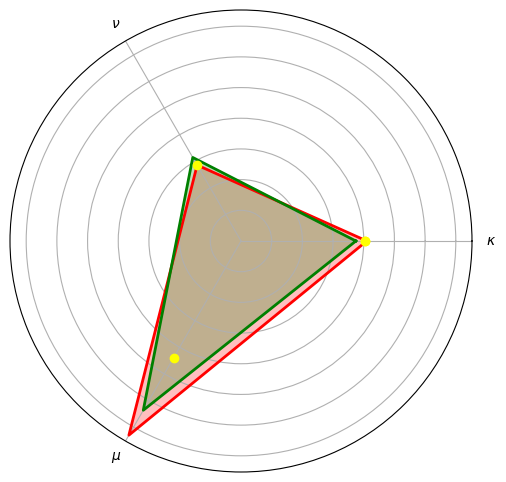

In [35]:
import matplotlib.pyplot as plt
# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

df = resf[['lower_threshold','veritas','score']].copy()
df.columns=['$\kappa$','$\\nu$','$\mu$']

# Select the columns to include in the radar chart
cols = df.columns.tolist()

# Number of variables we're plotting.
num_vars = len(cols)

# Compute the angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start value to the end.
values = df.iloc[0][cols].tolist()  # Use iloc here
values += values[:1]
angles += angles[:1]

# Draw one axe per variable and add labels
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)




df = resf3[['lower_threshold','veritas','score']].copy()
df.columns=['$\kappa$','$\\nu$','$\mu$']

# Select the columns to include in the radar chart
cols = df.columns.tolist()

# Number of variables we're plotting.
num_vars = len(cols)

# Compute the angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start value to the end.
values = df.iloc[0][cols].tolist()  # Use iloc here
values += values[:1]
angles += angles[:1]

# Draw one axe per variable and add labels
ax.fill(angles, values, color='green', alpha=0.25)
ax.plot(angles, values, color='green', linewidth=2)




df=resfva[resfva.dx==1]
df = df[['lower_threshold','veritas','score']].copy()
df.columns=['$\kappa$','$\\nu$','$\mu$']

# Select the columns to include in the radar chart
cols = df.columns.tolist()

# Number of variables we're plotting.
num_vars = len(cols)

# Compute the angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start value to the end.
values = df.iloc[0][cols].tolist()  # Use iloc here
values += values[:1]
angles += angles[:1]

# Draw one axe per variable and add labels
#ax.fill(angles, values, color='yellow', alpha=0.25)
ax.plot(angles, values, 'ko',color='yellow', linewidth=2)



# Labels for each point
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols)






In [34]:
angles

[0.0, 2.0943951023931953, 4.1887902047863905, 0.0]

In [36]:
df

,$\kappa$,$\nu$,$\mu$
CAT10091,1.012868,0.714286,1.098590
CAT10101,1.045107,0.732143,1.682821
CAT10061,1.067842,0.750000,1.232481
CAT10121,1.019825,0.660714,1.162571
CAT10151,1.074871,0.757022,1.377538
...,...,...,...
CAT12941,0.969447,0.750000,1.707637
CAT12921,1.231141,0.714286,1.076898
CAT12971,1.093406,0.750000,1.516369
CAT13001,1.020499,0.678571,1.195598


<Axes: title={'center': 'Sine Waves Modulated by Parameters'}, xlabel='X', ylabel='Sine Value'>

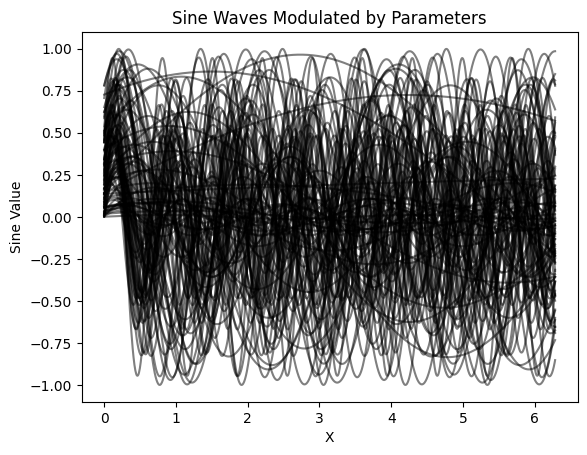

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sine_waves(parameters,col='k',ax=None):
    """
    Plot sine waves based on an array of parameters.
    
    Parameters:
    - parameters: A NumPy array where each row is [amplitude, frequency, phase_shift].
    """
    x = np.linspace(0, 2 * np.pi, 1000)  # Domain of the sine wave
    if ax is None:
        fig, ax = plt.subplots()
    
    for row in parameters:
        amplitude, frequency, phase_shift = row
        sine_wave = amplitude * np.sin(frequency * x + phase_shift)
        ax.plot(x, sine_wave, '-', color=col, alpha=0.5)  # 'k-' for black line, alpha for transparency

    plt.xlabel('X')
    plt.ylabel('Sine Value')
    plt.title('Sine Waves Modulated by Parameters')
    return ax

plot_sine_waves(df.values)


<Axes: title={'center': 'Sine Waves Modulated by Parameters'}, xlabel='X', ylabel='Sine Value'>

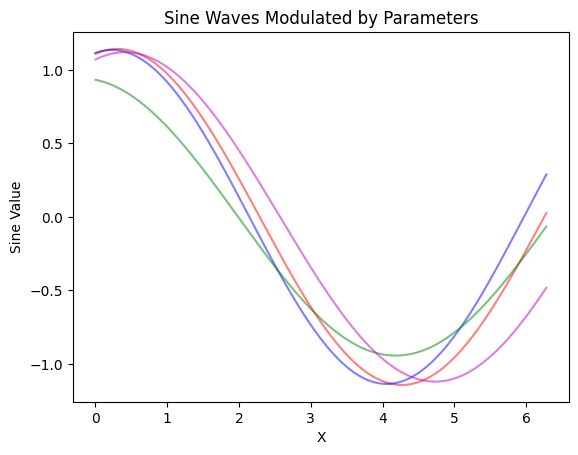

In [76]:
df3 = resf3[['lower_threshold','veritas','score']].copy()

df0 = resf[['lower_threshold','veritas','score']].copy()

ax=plot_sine_waves([df3.values.mean(axis=0)],'r')
plot_sine_waves([df0.values.mean(axis=0)],'b',ax=ax)
dfva=resfva[resfva.mg==-1]
dfva=dfva[['lower_threshold','veritas','score']].copy()

plot_sine_waves([dfva.values.mean(axis=0)],'g',ax=ax)
dfva=resfva[resfva.dx==1]
dfva=dfva[['lower_threshold','veritas','score']].copy()

plot_sine_waves([dfva.values.mean(axis=0)],'m',ax=ax)


In [69]:
df3.values.mean(axis=0)

array([1.14255876, 0.79208553, 1.32977341])